<a href="https://colab.research.google.com/github/joaoocker/data-analysis/blob/main/Shap_verification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import shap
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# Load California Housing Dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X.dtypes

,0
MedInc,float64
HouseAge,float64
AveRooms,float64
AveBedrms,float64
Population,float64
AveOccup,float64
Latitude,float64
Longitude,float64


In [ ]:
# Train an XGBoost Regressor
model = xgb.XGBRegressor()
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Create SHAP explainer
explainer = shap.Explainer(model)

# Calculate SHAP values
shap_values = explainer(X_test)


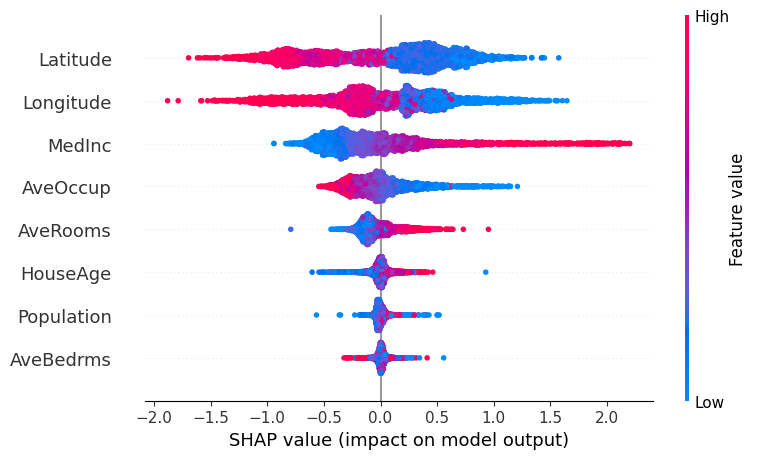

In [ ]:
shap.summary_plot(shap_values, X_test)


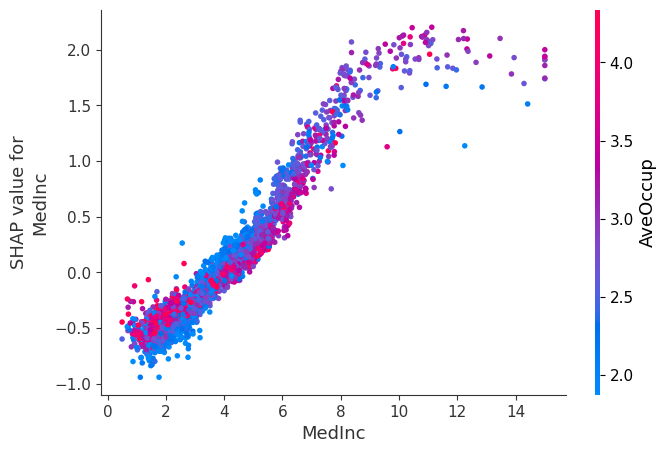

In [ ]:
shap.dependence_plot(0, shap_values.values, X_test)


In [ ]:
shap.initjs()

# Convert SHAP Explanation object to raw values
shap.force_plot(
    explainer.expected_value,  # Model's base value (mean prediction)
    shap_values.values[0],  # SHAP values for the first instance
    X_test.iloc[0]  # Feature values for the first instance
)
